# 2019 DEEP SPACE Rangefinding

Compare methods to find range to hatches and cargo loading holes in rocket and cargo ship.

Assume we rangefind from 12 in (30.5 cm) to 72 in (183 cm) from target.



## Time of Flight Rangefinding

- beam size and ability to aim from robot
- size and location of reflective surfaces
- effective range
- Competition surfaces
- Any sensor to sensor calibration requirements

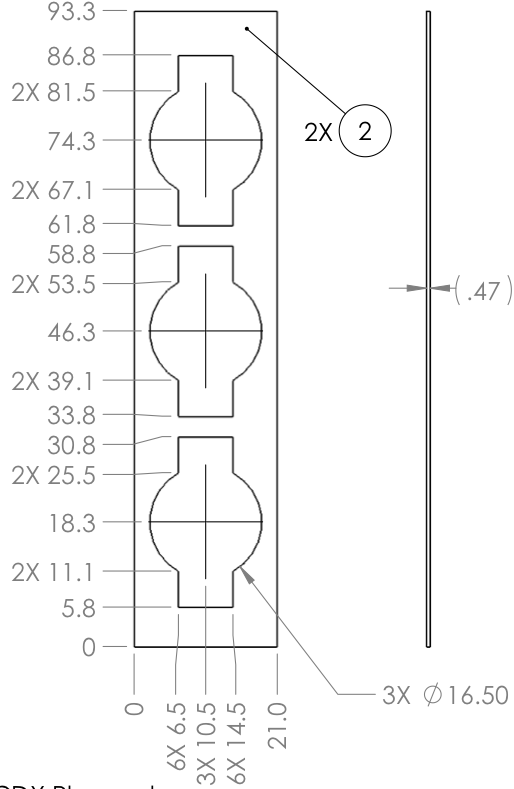


## Camera FOV Rangefinding

- Range resolution
- Accuracy impact of non-perpendicular measurement (squared to target)
- Real world feature detection accuracy
- Camera calibration requirements



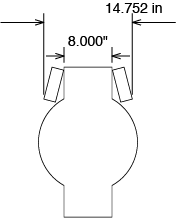

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import radians, tan
import numpy as np

In [2]:
# hatch targets, dimension across box bounding both targets
target_width_in = 14.752

In [3]:
def range(camera_pixels, camera_fov, target_pixels):
    subtended = (target_pixels / camera_pixels) * camera_fov
    return (0.5 * target_width_in) / tan(radians(0.5 * subtended))

range2 = np.vectorize(range)

## Camera FOV Range Resolution Estimates

Camera horizontal FOV needs to be verify, datasheet says 68.5 deg diagonal

- Camera 1280, FOV 60
- Camera 640, FOV 55

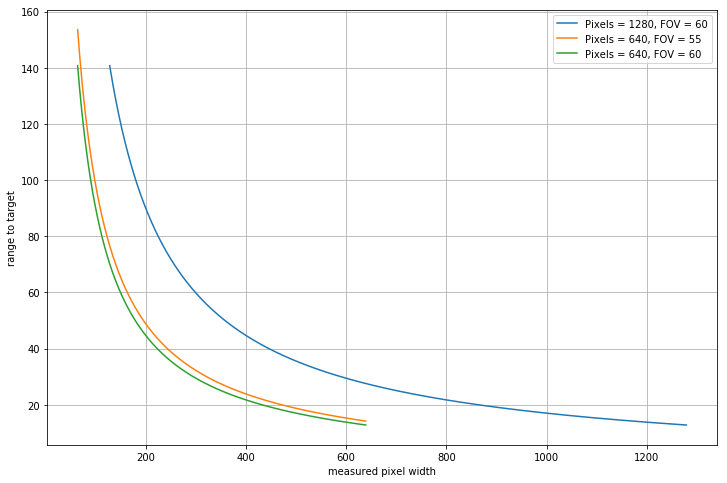

In [4]:
camera_pixels = 1280
camera_fov = 60
legends = []
plt.figure(figsize=(12, 8))
measurements = np.arange(camera_pixels / 10, camera_pixels)
plt.plot(measurements, range2(camera_pixels, camera_fov, measurements))
legends.append("Pixels = {}, FOV = {}".format(camera_pixels, camera_fov))

camera_pixels = 640
camera_fov = 55
measurements = np.arange(camera_pixels / 10, camera_pixels)
plt.plot(measurements, range2(camera_pixels, camera_fov, measurements))
legends.append("Pixels = {}, FOV = {}".format(camera_pixels, camera_fov))

camera_pixels = 640
camera_fov = 60
measurements = np.arange(camera_pixels / 10, camera_pixels)
plt.plot(measurements, range2(camera_pixels, camera_fov, measurements))
legends.append("Pixels = {}, FOV = {}".format(camera_pixels, camera_fov))

plt.legend(legends)

plt.xlabel('measured pixel width')
plt.ylabel('range to target')
plt.grid(True)

plt.show()